In [1]:
!pip install numpy librosa scikit-learn tensorflow matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
def extract_features(file_path, n_mfcc=40, n_fft=2048, hop_length=512):
    try :
        audio, sr = librosa.load(file_path, sr=None)
        segment_length = int(sr * 3)
        mfcc_list = []

        for start in range(0, len(audio) - segment_length + 1, segment_length):
            segment = audio[start:start + segment_length]
            mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T
            if mfcc.shape[0] == 130:
                mfcc_list.append(mfcc)
                break
        return mfcc_list[0] if mfcc_list else None
    except:
        return None

X, y = [], []
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for genre in genres:
    genre_path = f"Data/genres_original/{genre}"
    for file in os.listdir(genre_path):
        if file.endswith('.wav'):
            features = extract_features(os.path.join(genre_path, file))
            if features is not None:
                X.append(features)
                y.append(genre)
X = np.array(X)
y = np.array(y)
print(f"Loaded {len(X)} samples")

Loaded 999 samples


C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 256)            │         304,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 130, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 130, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,586 (1.99 MB)

 Trainable params: 519,818 (1.98 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.1728 - loss: 2.6000 - val_accuracy: 0.2750 - val_loss: 2.1251
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.3982 - loss: 1.7965 - val_accuracy: 0.3350 - val_loss: 1.9778
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.5132 - loss: 1.4592 - val_accuracy: 0.3550 - val_loss: 1.8856
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.5465 - loss: 1.2743 - val_accuracy: 0.3600 - val_loss: 1.8135
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.5828 - loss: 1.1352 - val_accuracy: 0.4000 - val_loss: 1.7243
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6893 - loss: 0.9193 - val_accuracy: 0.4450 - val_loss: 1.6343
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.7247 - loss: 0.7943 - val_accuracy: 0.4350 - val_loss: 1.6298
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.7703 - loss: 0.7268 - val_accu

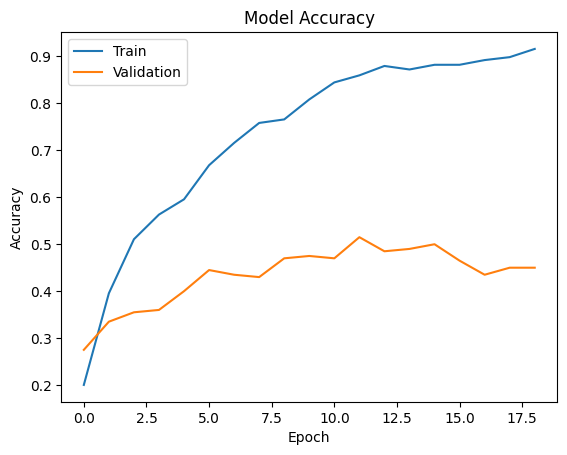

Model saved as 'music_genre_lstm.keras'


In [5]:
le = LabelEncoder()
y_encoded = to_categorical(le.fit_transform(y))
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(130,40)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(128),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 130, 40))
model.summary()

early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=32,callbacks=[early_stop],verbose=1)

# 6. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# 7. Plot Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8. Save Model
model.save('music_genre_lstm.keras')
print("Model saved as 'music_genre_lstm.keras'")

In [20]:
def predict_genre(file_path, model, le):
    mfcc_blocks = extract_features(file_path)

    if mfcc_blocks is None or len(mfcc_blocks) == 0:
        return "No features"

    mfcc = mfcc_blocks
    x = np.expand_dims(mfcc, axis=0)
    prob = model.predict(x, verbose=0)[0]
    idx = np.argmax(prob)
    genre = le.inverse_transform([idx])[0]
    confidence = prob[idx]
    return f"{genre} (confidence: {confidence:.2%})"
    
sample_file = "blues.00000.wav"      
print(sample_file,"->",predict_genre(sample_file, model, le))

blues.00000.wav -> blues (confidence: 99.85%)
